### 1. 生成数据集

In [134]:
import numpy as np 
from matplotlib import pyplot as plt
# 开源公共数据集,可以帮我们生成想要的数据集
from sklearn.datasets import make_blobs

In [135]:
x,y=make_blobs()
# 查看前3行
x[:3],y[:3]

(array([[ 4.81083326,  8.01301059],
        [ 1.30134686,  7.79008462],
        [-4.64310815,  9.0460597 ]]),
 array([2, 2, 1]))

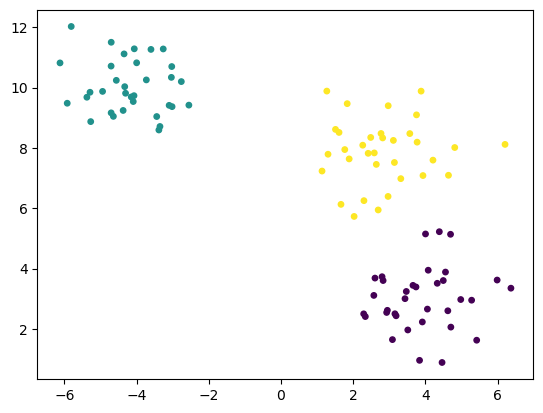

In [136]:

# 绘制散点图，x轴为x的第一列，y轴为x的第二列，点的颜色由y决定，点的大小为15
plt.scatter(x[:,0], x[:,1], c = y, s = 15)
plt.show()

In [137]:
# 使用 make_blobs 函数生成一个二维数据集
x, y = make_blobs(
    n_samples = 300,            # 样本数量为 300
    n_features = 2,             # 每个样本有 2 个特征
    centers = 3,                # 数据集分为 3 个簇
    cluster_std = 1,            # 每个簇的标准差为 1
    center_box = (-10, 10),     # 簇中心的范围在 [-10, 10] 之间
    random_state = 233,         # 设置随机种子以保证结果可复现
    return_centers = False      # 不返回簇中心
)

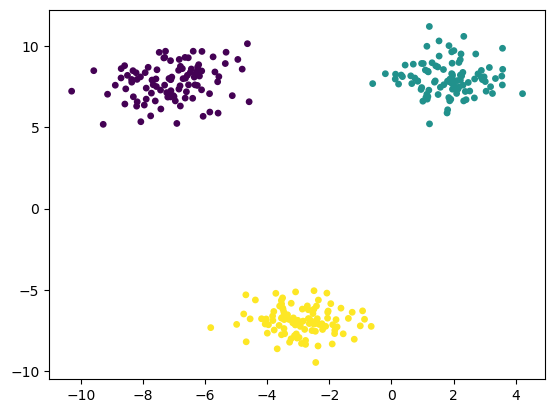

In [138]:
plt.scatter(x[:,0], x[:,1], c = y,s = 15)
plt.show()

### 2. 自己写代码划分数据集

In [139]:
index = np.arange(20)

In [140]:
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [141]:
np.random.shuffle(index)

In [142]:
index

array([17, 14,  7,  4,  3,  2,  9, 11, 15, 16,  5, 13,  1,  0,  6,  8, 10,
       18, 12, 19])

In [143]:
# 生成一个随机排列的数组,效果等同于shuffle
np.random.permutation(20)

array([ 3, 19,  4,  9, 16, 12, 18,  8,  0, 14,  7,  6, 10, 11,  2,  1, 17,
       13, 15,  5])

In [144]:
np.random.seed(233)
shuffle = np.random.permutation(len(x))

In [145]:
shuffle[:10]

array([ 23,  86, 204, 287, 206, 170, 234,  94, 146, 180])

In [146]:
shuffle.shape

(300,)

In [147]:
# 设置训练集比例
train_size = 0.7

In [148]:
# 根据训练集比例划分训练集索引
train_index = shuffle[:int(len(x) * train_size)]

In [149]:
# 根据训练集比例划分测试集索引
test_index = shuffle[int(len(x) * train_size):]

In [150]:
train_index.shape, test_index.shape

((210,), (90,))

In [151]:
x[train_index].shape, y[train_index].shape

((210, 2), (210,))

In [152]:
x[test_index].shape, y[test_index].shape

((90, 2), (90,))

In [153]:
# 自定义训练集和测试集划分函数
def my_train_test_split(x, y, train_size = 0.7, random_state = None):
    if random_state:
        np.random.seed(random_state)
    shuffle = np.random.permutation(len(x))
    train_index = shuffle[:int(len(x) * train_size)]
    test_index = shuffle[int(len(x) * train_size):]
    return x[train_index], x[test_index], y[train_index], y[test_index]

In [154]:
x_train, x_test, y_train, y_test = my_train_test_split(x, y, train_size = 0.7, random_state = 233)

In [155]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((210, 2), (90, 2), (210,), (90,))

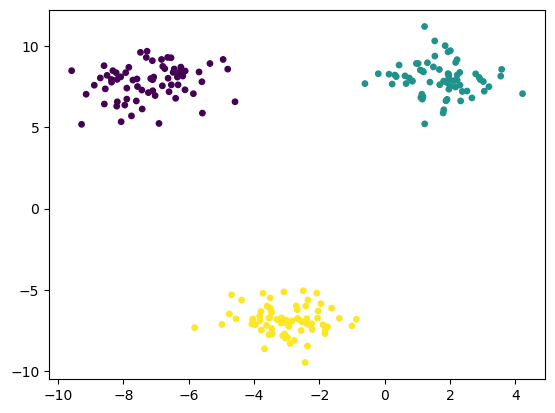

In [156]:
# 绘制训练集的散点图
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train, s = 15)
plt.show()

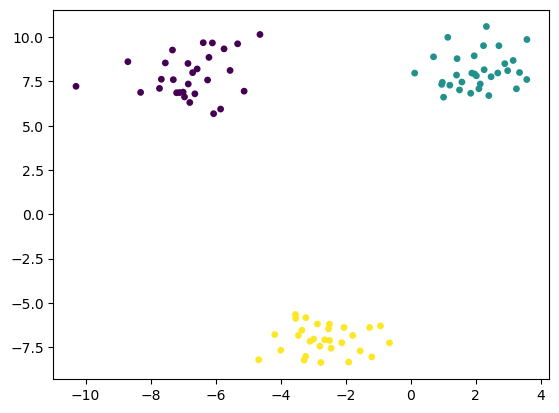

In [157]:
# 绘制测试集的散点图
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test, s = 15)
plt.show()

### 3. 使用sklearn划分数据集

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
# 使用 train_test_split 函数将数据集划分为训练集和测试集
# 参数说明：
# x: 特征数据
# y: 标签数据
# train_size: 训练集的比例，这里设置为 0.7，表示 70% 的数据用于训练
# random_state: 随机种子，用于保证结果的可复现性，这里设置为 233
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=233)

In [160]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((210, 2), (90, 2), (210,), (90,))

In [161]:
from collections import Counter
Counter(y_test)

Counter({np.int64(2): 34, np.int64(1): 31, np.int64(0): 25})

In [162]:
# stratify: 设置为y，表示按照标签y的比例进行分层抽样，确保训练集和测试集中各个类别的比例与原始数据集一致
# 此划分方法相比之前的划分有以下优点：
# 1. 使用分层抽样，保证了数据集划分后类别分布的平衡性
# 2. 避免了某些类别在训练集或测试集中样本过少的情况
# 3. 提高了模型训练的稳定性和泛化能力
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 233, stratify = y)

In [163]:
# 可以看到,训练集和测试集的标签分布和原始数据集保持一致
Counter(y),Counter(y_train), Counter(y_test)

(Counter({np.int64(1): 100, np.int64(0): 100, np.int64(2): 100}),
 Counter({np.int64(0): 70, np.int64(2): 70, np.int64(1): 70}),
 Counter({np.int64(2): 30, np.int64(0): 30, np.int64(1): 30}))